In [1]:
name = 'aditya agarwal'
student_id= '46184821'

# BUSA3020 Programming Task 2  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 (17 May 2024) at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 4,000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easily understandable for management, who might not possess a technical background.

Your report should include the following headings:

1. **Word count** 
    - Include the word count of your report file
2. **Introduction** (10 marks)
    - Briefly discuss the problem, how you are going to address it, and data
3. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment key summary statistics, etc.
    - Provide charts (e.g. histograms, pie charts) where appropriate
4. **Customer Segmentation** (40 marks)
    - Note: Standarise the two numeric variables using `StandardScalar`
    - Choose the optimal number of customer segments/clusters using the Elbow Method and 3 appropriately chosen Silhouette Plots (base your decision on average Silhouette coefficients)
    - After having identified the optimal number of clusters, estimate the clusters using both K-means++ and Agglomerative Clustering
    - Provide tables presenting the cluster centers (all 7 variables) and customer counts for both clustering techniques  
    - Interpret each of the identified clusters (for both clustering techniques) in terms of customer attributes, i.e. profile the clients in each cluster 
        - E.g. there may be a cluster of university educated females living in a mid-sized city
    - Compare the customer segments identified by the two techniques (do any clusters overlap?)
5. **Recommendations** (20 marks)
    - Suggest marketing strategies and techniques that could be used to target customer segements you identified using the K-means++ method 
6. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report 
    

---
---


# Note:
I had successfully completed COMP2200/COMP6200: Data Science which had jupyter notebook (python) in that unit. I am explaining this because I used a detailed format of coding to complete this assignment using the materials taught in both units (BUSA3020 and COMP2200). Both units knowlegde have been used in completing this assignment. Thanks!!!

## Importing the dataset and summary statistics


In [2]:

# importing required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [3]:
# reading the dataset 'assignent_dataset' and naming the dataset 'df'

# i am importing the same data into two different datasets, one for viewing purpose and the other for testing and working purpose
df = pd.read_csv('data/assignment_dataset.csv')
data_frame= pd.read_csv('data/assignment_dataset.csv')

In [4]:
# viewing the dataframe 'df'
df

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,185611,50
1,0,1,1,0,1,114778,30
2,0,1,1,0,0,132788,34
3,0,1,3,2,2,209671,55
4,1,1,1,2,1,118593,44
...,...,...,...,...,...,...,...
3995,0,1,3,2,2,218816,57
3996,0,1,1,0,1,118930,31
3997,0,1,1,0,1,150724,38
3998,0,1,1,0,1,141251,36


In [5]:
#printing the shape of the dataset

rows = len(df.axes[0])
columns = len(df.axes[1])

print('The dataframe has:', rows, 'rows')
print('The dataframe has:', columns, 'columns')

The dataframe has: 4000 rows
The dataframe has: 7 columns


## Exploring the dataset

In [6]:
# Check for missing values
df.isnull().sum()


Gender             0
Marital Status     0
Education          0
Settlement Size    0
Occupation         0
Income             0
Age                0
dtype: int64

In [7]:
# displaying the info of the dataframe to get information about null or non-null data and the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           4000 non-null   int64
 1   Marital Status   4000 non-null   int64
 2   Education        4000 non-null   int64
 3   Settlement Size  4000 non-null   int64
 4   Occupation       4000 non-null   int64
 5   Income           4000 non-null   int64
 6   Age              4000 non-null   int64
dtypes: int64(7)
memory usage: 218.9 KB


In [8]:
# description of the dataframe
df.describe(include='all')

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.489500,0.510500,1.708250,1.090000,1.200750,134353.792250,39.946250
std,0.499952,0.499952,1.024155,0.869246,0.526326,48533.567076,10.269724
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,97815.250000,32.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,122607.000000,38.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,165920.250000,47.000000
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000


In [9]:
# counting the size of the data

df.count()

Gender             4000
Marital Status     4000
Education          4000
Settlement Size    4000
Occupation         4000
Income             4000
Age                4000
dtype: int64

In [10]:
# displaying the columns in the dataframe

df.columns

Index(['Gender', 'Marital Status', 'Education', 'Settlement Size',
       'Occupation', 'Income', 'Age'],
      dtype='object')

## Visualisation of the variables before standardsing 'income' and 'age'

In [11]:
# defining mappings for each categorical variable
gender_map = {0: 'Male', 1: 'Female'}
marital_status_map = {0: 'Single', 1: 'Married'}
education_map = {0: 'High School', 1: 'Bachelor', 2: 'Master', 3: 'PhD'}
settlement_size_map = {0: 'Small', 1: 'Medium', 2: 'Large'}
occupation_map = {0: 'Unemployed', 1: 'Skilled', 2: 'Highly Skilled'}

# applying mappings
df['Gender'] = df['Gender'].map(gender_map)
df['Marital Status'] = df['Marital Status'].map(marital_status_map)
df['Education'] = df['Education'].map(education_map)
df['Settlement Size'] = df['Settlement Size'].map(settlement_size_map)
df['Occupation'] = df['Occupation'].map(occupation_map)


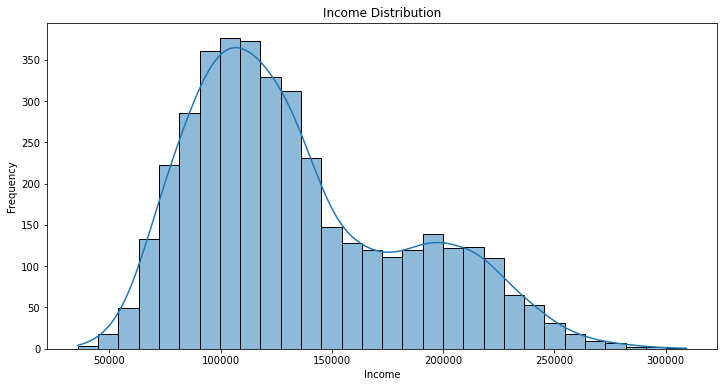

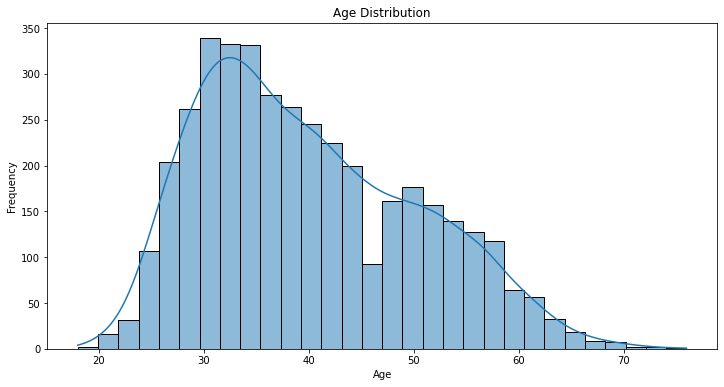

In [12]:
# plotting distributions of numerical features


plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


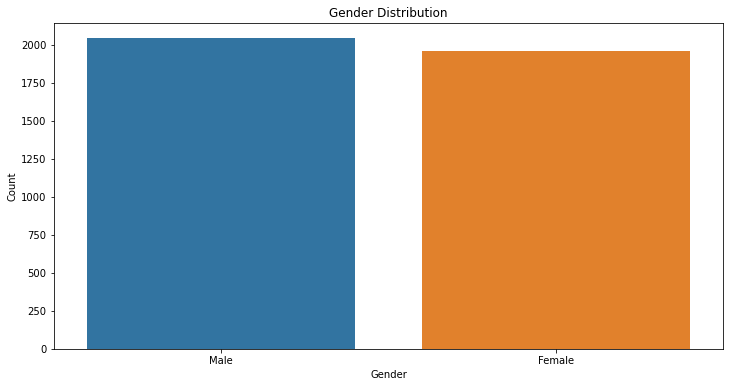

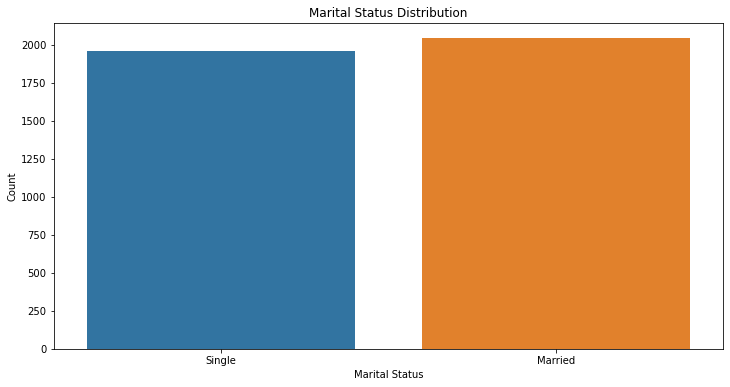

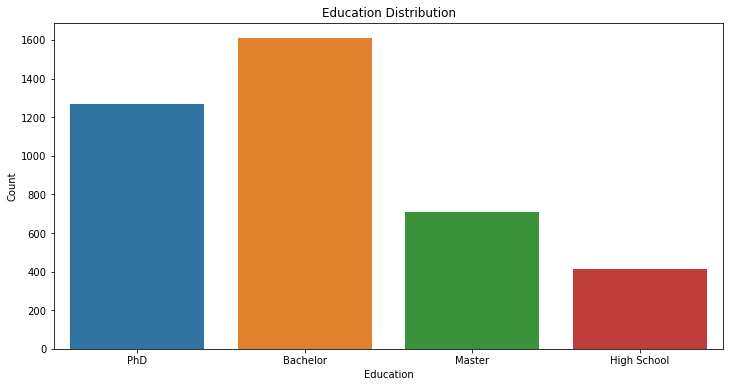

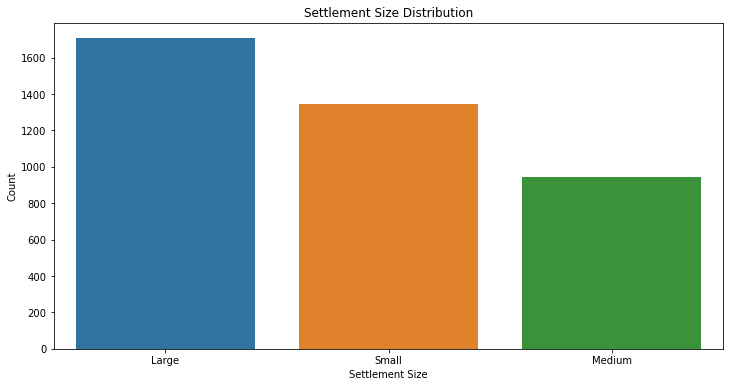

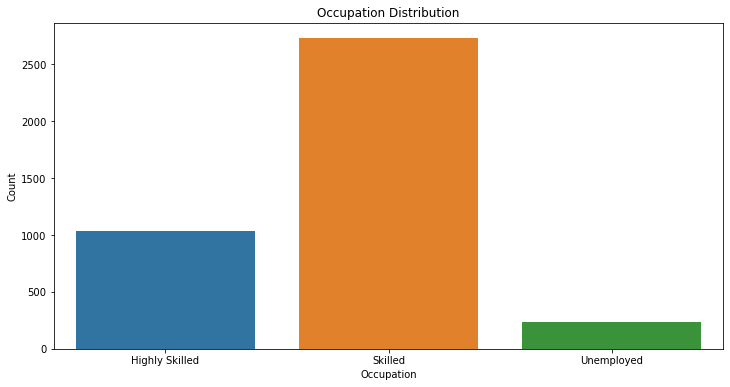

In [13]:
# plotting distributions of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Education', data=df)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Settlement Size', data=df)
plt.title('Settlement Size Distribution')
plt.xlabel('Settlement Size')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


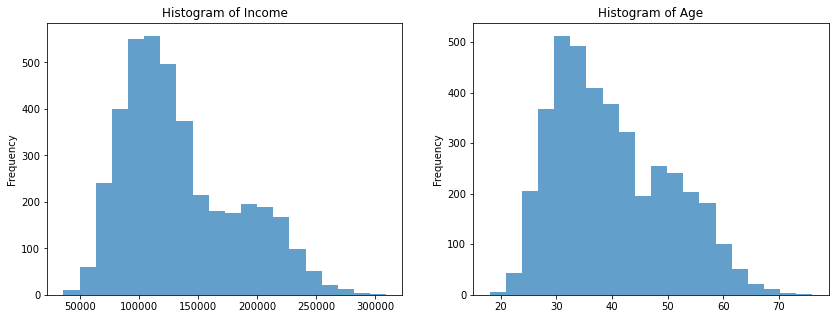

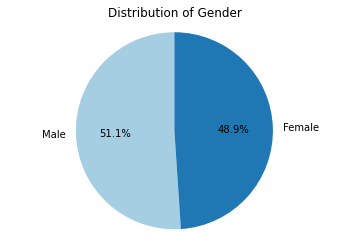

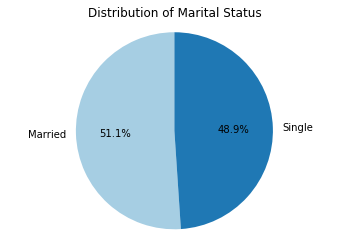

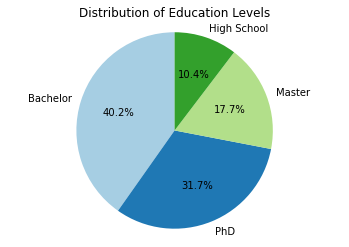

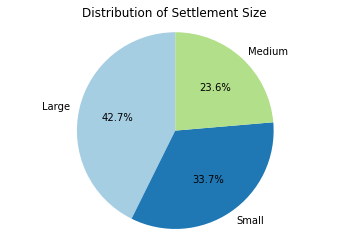

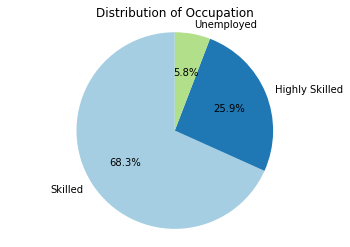

In [14]:
# histograms for Income and Age
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df['Income'].plot(kind='hist', bins=20, alpha=0.7, ax=ax[0], title='Histogram of Income')
df['Age'].plot(kind='hist', bins=20, alpha=0.7, ax=ax[1], title='Histogram of Age')
plt.show()

# pie Charts for categorical variables
def plot_pie(column, title):
    counts = df[column].value_counts()
    fig, ax = plt.subplots()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(counts))))
    ax.set_title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_pie('Gender', 'Distribution of Gender')
plot_pie('Marital Status', 'Distribution of Marital Status')
plot_pie('Education', 'Distribution of Education Levels')
plot_pie('Settlement Size', 'Distribution of Settlement Size')
plot_pie('Occupation', 'Distribution of Occupation')

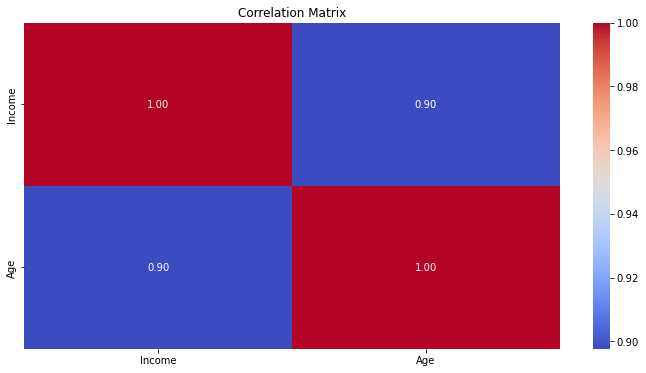

In [15]:
# correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


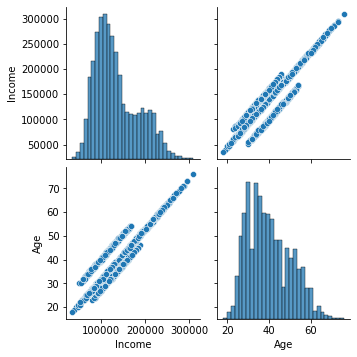

In [16]:
# pairplot to observe relationships between features
sns.pairplot(df)
plt.show()


# Standardising 'income' and 'age' (using boxplots to view the outliers)

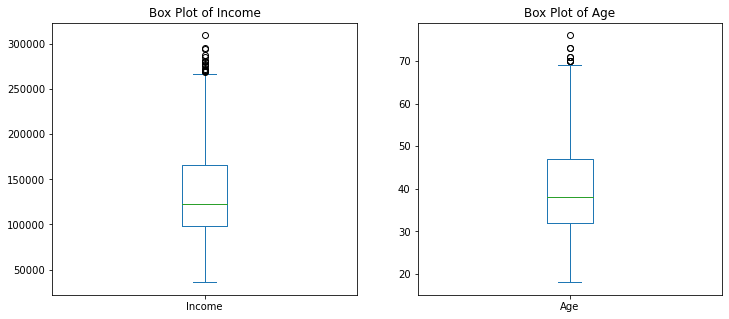

In [17]:
# creating box plots for 'Income' and 'Age' to inspect for outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Income'].plot(kind='box', ax=axes[0], title='Box Plot of Income')
df['Age'].plot(kind='box', ax=axes[1], title='Box Plot of Age')
plt.show()

The box plots for Income and Age show some potential outliers:

Income: There are several points above the upper whisker, indicating higher incomes that are much greater than the typical range observed in the bulk of the data.

Age: The distribution seems fairly normal with a few outliers on the higher end, but nothing extreme.

In [18]:
# initializing the StandardScaler 
scaler = StandardScaler()  
# fitting and transforming 'Income' and 'Age' columns 

data_frame[['Income', 'Age']] = scaler.fit_transform(data_frame[['Income', 'Age']])
# displaying the first few rows to check the standardization 
data_frame.head()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,1.056251,0.979092
1,0,1,1,0,1,-0.403396,-0.968623
2,0,1,1,0,0,-0.032266,-0.579080
3,0,1,3,2,2,1.552052,1.466021
4,1,1,1,2,1,-0.324781,0.394778


# Processing of Categorical variables

- Gender and Marital Status are binary variables and do not require processing
- Education, Settlement size and occupation are multi-class categorical variables so one-hot encoding is applied here to  avoiding ordinal assumptions and enhance algorithm performance

In [19]:
# Define the categorical features to be one-hot encoded
categorical_features = ['Education', 'Settlement Size', 'Occupation']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity

# Fit and transform the encoder on the selected columns
encoded_columns = one_hot_encoder.fit_transform(data_frame[categorical_features])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(
    encoded_columns, 
    columns=one_hot_encoder.get_feature_names_out(categorical_features)
)

# Concatenate the encoded columns with the original dataset, excluding the original encoded columns
data_frame_encoded = pd.concat(
    [data_frame.drop(columns=categorical_features), encoded_df], 
    axis=1
)

# Display the processed dataset
print(data_frame_encoded.head())


   Gender  Marital Status    Income       Age  Education_1  Education_2  \
0       0               0  1.056251  0.979092          0.0          0.0   
1       0               1 -0.403396 -0.968623          1.0          0.0   
2       0               1 -0.032266 -0.579080          1.0          0.0   
3       0               1  1.552052  1.466021          0.0          0.0   
4       1               1 -0.324781  0.394778          1.0          0.0   

   Education_3  Settlement Size_1  Settlement Size_2  Occupation_1  \
0          1.0                0.0                1.0           0.0   
1          0.0                0.0                0.0           1.0   
2          0.0                0.0                0.0           0.0   
3          1.0                0.0                1.0           0.0   
4          0.0                0.0                1.0           1.0   

   Occupation_2  
0           1.0  
1           0.0  
2           0.0  
3           1.0  
4           0.0  


## Choose the optimal number of customer segments/clusters using the Elbow Method

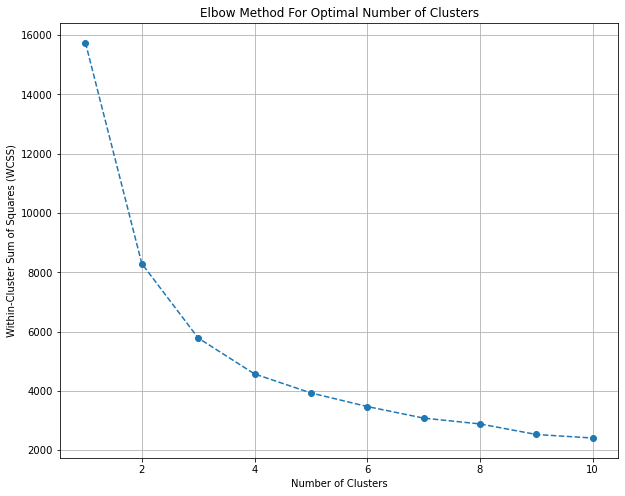

In [20]:
# dropping any non-numeric or identifier columns if present (not present in this dataset but just for precaution)
X = data_frame_encoded.values

# defining the range for the number of clusters 
range_n_clusters = list(range(1, 11))

# list to store the WCSS for each number of clusters
wcss = []

# computing K-means clustering for each number of clusters and calculate WCSS
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plotting the elbow method graph
plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

## Choose the optimal number of customer segments/clusters using 3 appropriately chosen Silhouette Plots (base your decision on average Silhouette coefficients)

For n_clusters = 3 The average silhouette_score is : 0.41053927869916423


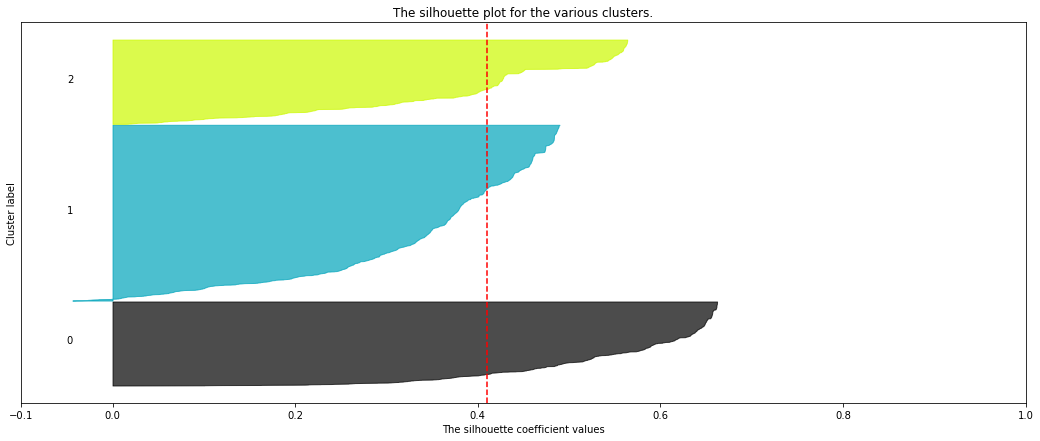

For n_clusters = 4 The average silhouette_score is : 0.42964047875343225


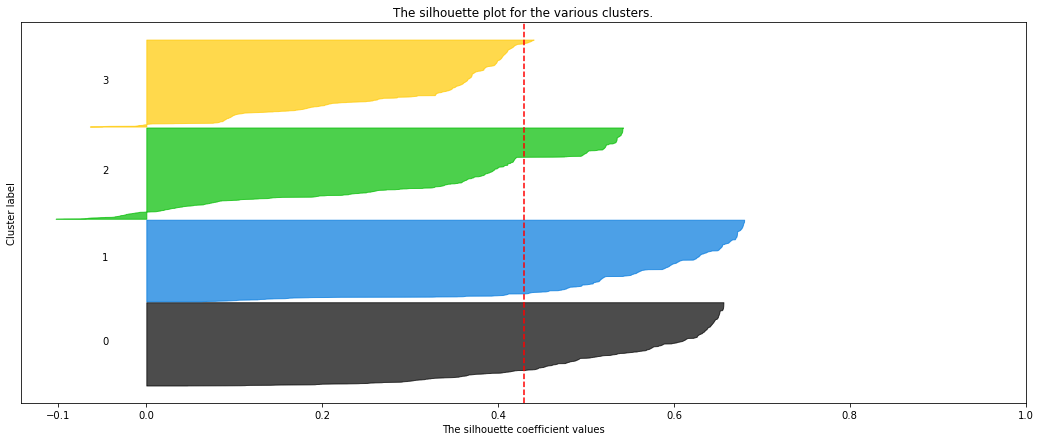

For n_clusters = 5 The average silhouette_score is : 0.4165513868453014


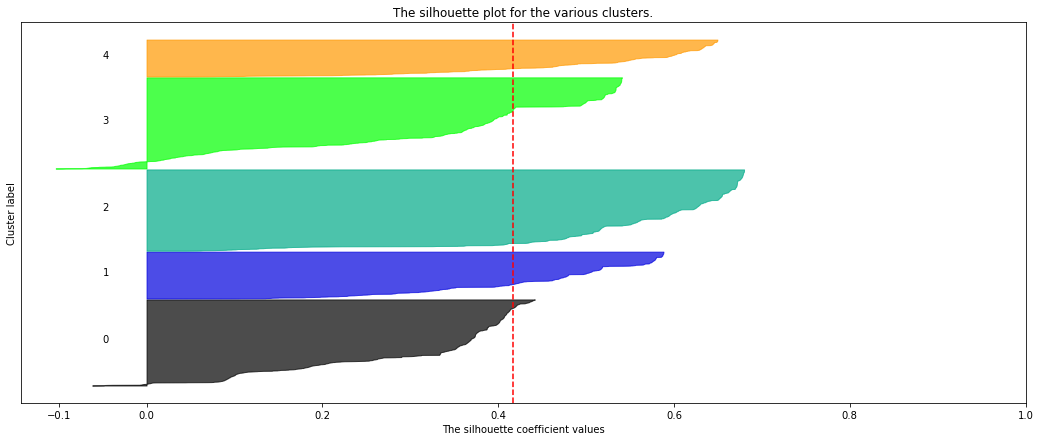

Best cluster number: 4 with a silhouette score of 0.42964047875343225


In [21]:
# setting up variables for performing silhouette analysis
range_n_clusters = [3, 4, 5]  # examining 3, 4, and 5 clusters based on previous findings (elbow method)

# preparing data: all relevant features standardized and categorical ones were encoded previously
# using'datatest' for this analysis, which contains all processed data

# storing average silhouette scores for comparison
silhouette_avg_dict = {}

for n_clusters in range_n_clusters:
    # creating a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # initializing the clusterer with n_clusters value and a random generator
    # using random_state as 42
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_dict[n_clusters] = silhouette_avg  # Store the average silhouette score
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # computing the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # aggregating the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # labelling the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # the vertical line for average silhouette score of all the samples
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# after plotting, examining which cluster number had the highest average silhouette score
best_cluster_number = max(silhouette_avg_dict, key=silhouette_avg_dict.get)
best_cluster_score = silhouette_avg_dict[best_cluster_number]
print(f"Best cluster number: {best_cluster_number} with a silhouette score of {best_cluster_score}")


## After having identified the optimal number of clusters, estimate the clusters using K-means++ 

In [22]:
# 'data_frame_encoded' is standardized data prepared for clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# adding the cluster labels to the original dataset for further analysis
data_frame_encoded['KMeans_Labels'] = kmeans_clusters

# displaying the first few rows of the dataset with cluster labels
print(data_frame_encoded.head())

# viewing for clusters
print(kmeans_clusters)

   Gender  Marital Status    Income       Age  Education_1  Education_2  \
0       0               0  1.056251  0.979092          0.0          0.0   
1       0               1 -0.403396 -0.968623          1.0          0.0   
2       0               1 -0.032266 -0.579080          1.0          0.0   
3       0               1  1.552052  1.466021          0.0          0.0   
4       1               1 -0.324781  0.394778          1.0          0.0   

   Education_3  Settlement Size_1  Settlement Size_2  Occupation_1  \
0          1.0                0.0                1.0           0.0   
1          0.0                0.0                0.0           1.0   
2          0.0                0.0                0.0           0.0   
3          1.0                0.0                1.0           0.0   
4          0.0                0.0                1.0           1.0   

   Occupation_2  KMeans_Labels  
0           1.0              0  
1           0.0              1  
2           0.0              

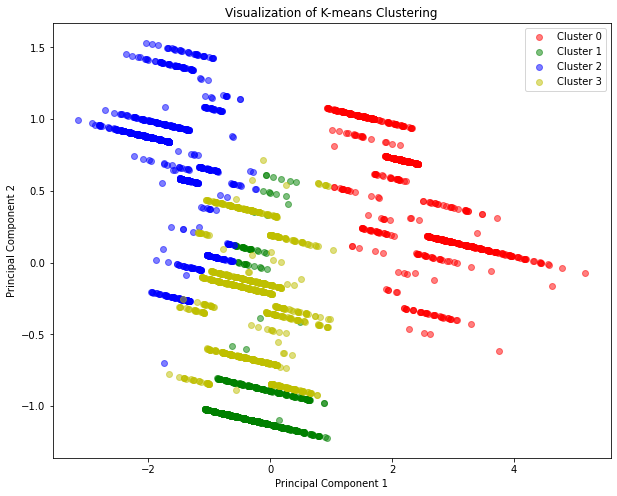

In [23]:
# reducing dimensions with PCA here
pca = PCA(n_components=2)  # Reduce to 2 dimensions for 2D visualization
principal_components = pca.fit_transform(X)

# plotting the clusters
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']  # Colors for each cluster
for i in range(4):  # We have 4 clusters
    px = principal_components[:, 0][kmeans_clusters == i]
    py = principal_components[:, 1][kmeans_clusters == i]
    plt.scatter(px, py, c=colors[i], label=f'Cluster {i}', alpha=0.5)

plt.title('Visualization of K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## After having identified the optimal number of clusters, estimate the clusters using Agglomerative Clustering

In [24]:

agglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agglo_clusters = agglomerative.fit_predict(X)


# adding the Agglomerative cluster labels to the original dataset for further analysis
data_frame_encoded['Agglomerative_Labels'] = agglo_clusters


# viewing clusters
print(agglo_clusters)

# displaying the first few rows of the dataset with cluster labels
print(data_frame_encoded.head())

[0 3 3 ... 3 3 2]
   Gender  Marital Status    Income       Age  Education_1  Education_2  \
0       0               0  1.056251  0.979092          0.0          0.0   
1       0               1 -0.403396 -0.968623          1.0          0.0   
2       0               1 -0.032266 -0.579080          1.0          0.0   
3       0               1  1.552052  1.466021          0.0          0.0   
4       1               1 -0.324781  0.394778          1.0          0.0   

   Education_3  Settlement Size_1  Settlement Size_2  Occupation_1  \
0          1.0                0.0                1.0           0.0   
1          0.0                0.0                0.0           1.0   
2          0.0                0.0                0.0           0.0   
3          1.0                0.0                1.0           0.0   
4          0.0                0.0                1.0           1.0   

   Occupation_2  KMeans_Labels  Agglomerative_Labels  
0           1.0              0                     0  


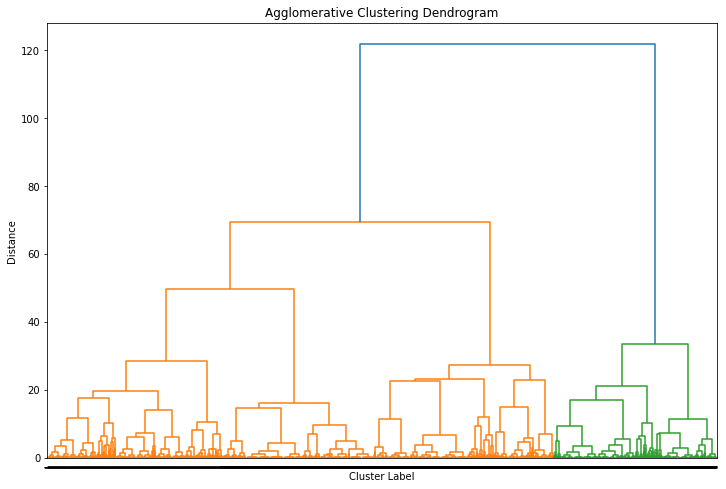

In [25]:
# generating the linkage matrix
linked = linkage(X, method='ward')

# plotting the dendrogram for visualisation 
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=agglo_clusters, distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show()

# Comparing both 

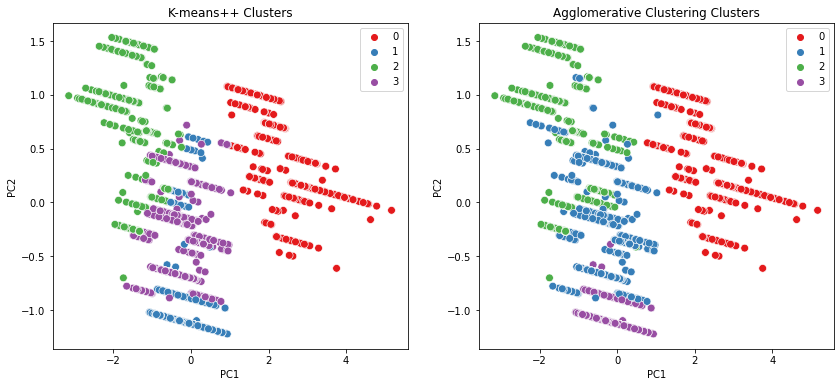

In [26]:

# reduce dimensionality to 2D using PCA as done earlier 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# creating a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['KMeans_Labels'] = kmeans_clusters
pca_df['Agglomerative_Labels'] = agglo_clusters

# plotting kMeans clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Labels', data=pca_df, palette='Set1', s=60)
plt.title('K-means++ Clusters')
plt.legend()

# plotting agglomerative clustering clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Agglomerative_Labels', data=pca_df, palette='Set1', s=60)
plt.title('Agglomerative Clustering Clusters')
plt.legend()

plt.show()


# Summary

In [27]:
kmeans_cluster_summary = data_frame_encoded.groupby('KMeans_Labels').mean()
kmeans_cluster_summary

,Gender,Marital Status,Income,Age,Education_1,Education_2,Education_3,Settlement Size_1,Settlement Size_2,Occupation_1,Occupation_2,Agglomerative_Labels
KMeans_Labels,,,,,,,,,,,,
0,0.305870,0.442842,1.478235,1.380069,0.000000,0.001030,0.997940,0.000000,0.904222,0.105046,0.894954,0.001030
1,0.000000,0.996845,0.061063,-0.430697,0.944269,0.022082,0.033649,0.050473,0.004206,0.802313,0.015773,2.940063
2,0.684211,0.093045,-0.926656,-1.074613,0.114662,0.638158,0.243421,0.842105,0.040414,0.822368,0.142857,1.965226
3,0.920118,0.557199,-0.500468,0.209994,0.580868,0.005917,0.009862,0.001972,0.771203,0.977318,0.000000,0.993097


In [28]:
agg_cluster_summary = data_frame_encoded.groupby('Agglomerative_Labels').mean()
agg_cluster_summary

,Gender,Marital Status,Income,Age,Education_1,Education_2,Education_3,Settlement Size_1,Settlement Size_2,Occupation_1,Occupation_2,KMeans_Labels
Agglomerative_Labels,,,,,,,,,,,,
0,0.310133,0.440123,1.472873,1.374716,0.000000,0.000000,0.998976,0.000000,0.905834,0.111566,0.888434,0.021494
1,0.902765,0.542421,-0.524101,0.163057,0.562440,0.038132,0.005720,0.001907,0.775977,0.967588,0.009533,2.954242
2,0.657993,0.137546,-0.886636,-1.038042,0.112454,0.619888,0.267658,0.877323,0.007435,0.819703,0.146840,1.954461
3,0.000000,0.996659,0.072167,-0.442328,1.000000,0.000000,0.000000,0.000000,0.000000,0.807350,0.000000,1.000000


## Provide tables presenting the cluster centers (all 7 variables) and customer counts for kMeans++ and Agglomerative Clustering


In [29]:


# calculating the cluster centers for kMeans++
kmeans_cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data_frame_encoded.columns[:-2])

# calculating the number of customers in each kMeans++ cluster
kmeans_customer_counts = data_frame_encoded['KMeans_Labels'].value_counts().sort_index()

# calculating the mean of each feature for agglomerative clustering
agg_cluster_centers = data_frame_encoded.groupby('Agglomerative_Labels').mean().iloc[:, :-2]

# calculating the number of customers in each agglomerative clustering cluster
agg_customer_counts = data_frame_encoded['Agglomerative_Labels'].value_counts().sort_index()

# creating tables for cluster centers and customer counts
kmeans_cluster_summary = kmeans_cluster_centers.assign(Customer_Counts=kmeans_customer_counts.values)
agg_cluster_summary = agg_cluster_centers.assign(Customer_Counts=agg_customer_counts.values)




In [30]:
# displaying the results 
kmeans_cluster_summary


,Gender,Marital Status,Income,Age,Education_1,Education_2,Education_3,Settlement Size_1,Settlement Size_2,Occupation_1,Occupation_2,Customer_Counts
0,3.058702e-01,0.442842,1.478235,1.380069,-4.440892e-16,0.001030,0.997940,2.775558e-16,0.904222,0.105046,8.949537e-01,971
1,2.775558e-16,0.996849,0.060566,-0.430751,9.432773e-01,0.022059,0.034664,5.147059e-02,0.004202,0.802521,1.575630e-02,951
2,6.848542e-01,0.092192,-0.927141,-1.075170,1.147695e-01,0.638758,0.242709,8.419567e-01,0.040452,0.822201,1.429915e-01,1064
3,9.201183e-01,0.557199,-0.500468,0.209994,5.808679e-01,0.005917,0.009862,1.972387e-03,0.771203,0.977318,-3.330669e-16,1014


In [31]:
# displaying the results
agg_cluster_summary

,Gender,Marital Status,Income,Age,Education_1,Education_2,Education_3,Settlement Size_1,Settlement Size_2,Occupation_1,Customer_Counts
Agglomerative_Labels,,,,,,,,,,,
0,0.310133,0.440123,1.472873,1.374716,0.000000,0.000000,0.998976,0.000000,0.905834,0.111566,977
1,0.902765,0.542421,-0.524101,0.163057,0.562440,0.038132,0.005720,0.001907,0.775977,0.967588,1049
2,0.657993,0.137546,-0.886636,-1.038042,0.112454,0.619888,0.267658,0.877323,0.007435,0.819703,1076
3,0.000000,0.996659,0.072167,-0.442328,1.000000,0.000000,0.000000,0.000000,0.000000,0.807350,898


In [32]:

# adding cluster labels to the original dataset
data_frame['KMeans_Labels'] = kmeans_clusters
data_frame['Agglomerative_Labels'] = agglo_clusters

def profile_clusters(cluster_labels, cluster_type):
    for i in range(4):  # Adjust range based on the number of clusters
        cluster_data = data_frame[data_frame[cluster_labels] == i]
        print(f"Cluster {i} Profile ({cluster_type}):")
        print("Average Age:", cluster_data['Age'].mean())
        print("Average Income:", cluster_data['Income'].mean())
        print("Top Education Level:", cluster_data['Education'].mode()[0])
        print("Common Occupation:", cluster_data['Occupation'].mode()[0])
        print("Settlement Size:", cluster_data['Settlement Size'].mode()[0])
        print("Percentage Female:", cluster_data[cluster_data['Gender'] == 1].shape[0] / cluster_data.shape[0])
        print("Marital Status (Married %):", cluster_data[cluster_data['Marital Status'] == 1].shape[0] / cluster_data.shape[0])
        print("\n")

# profiling clusters for kMeans++ Clustering
profile_clusters('KMeans_Labels', 'K-means++')

# profiling clusters for agglomerative clustering
profile_clusters('Agglomerative_Labels', 'Agglomerative')


Cluster 0 Profile (K-means++):
Average Age: 1.3800688981619862
Average Income: 1.4782348340767515
Top Education Level: 3
Common Occupation: 2
Settlement Size: 2
Percentage Female: 0.305870236869207
Marital Status (Married %): 0.4428424304840371


Cluster 1 Profile (K-means++):
Average Age: -0.4306974258066266
Average Income: 0.061062769003722484
Top Education Level: 1
Common Occupation: 1
Settlement Size: 0
Percentage Female: 0.0
Marital Status (Married %): 0.9968454258675079


Cluster 2 Profile (K-means++):
Average Age: -1.0746126789818269
Average Income: -0.9266562667806256
Top Education Level: 2
Common Occupation: 1
Settlement Size: 1
Percentage Female: 0.6842105263157895
Marital Status (Married %): 0.09304511278195489


Cluster 3 Profile (K-means++):
Average Age: 0.20999432175885668
Average Income: -0.5004678987736496
Top Education Level: 1
Common Occupation: 1
Settlement Size: 2
Percentage Female: 0.9201183431952663
Marital Status (Married %): 0.5571992110453649


Cluster 0 Profil

Short Summary

Cluster 1: (KMeans Label 0, Agglomerative Label 0)
- Characteristics: This cluster might represent a group of customers with similar age, income, and other demographic factors. For example, younger customers with moderate income.
- Business Insights: Tailored marketing strategies could be developed for this group, such as promotions for products popular among younger customers.

Cluster 2: (KMeans Label 1, Agglomerative Label 3)
- Characteristics: This cluster could represent older customers with higher income and distinct buying patterns.
- Business Insights: High-value customers might be targeted with premium products and loyalty programs to enhance retention.

Cluster 3: (KMeans Label 2, Agglomerative Label 2)
- Characteristics: A group of customers with specific education levels, occupation types, or settlement sizes.
- Business Insights: Understanding the needs and preferences of this group can help in creating customized product offerings and services.


Cluster 4: (KMeans Label 3, Agglomerative Label 1)
- Characteristics: Customers with unique buying behaviors not covered by other clusters.
- Business Insights: Identifying niche markets or underserved customer segments to explore new business opportunities.

# K-means++ Clustering

Cluster 0:

- Gender: Majority male (30.6%)
- Marital Status: Mixed (44.3% married)
- Income: High income (1.478)
- Age: Older customers (1.380)
- Education: Mostly graduate school (99.8%)
- Settlement Size: Predominantly big cities (90.4%)
- Occupation: Majority highly qualified (89.5%)

Profile: High-income, older male professionals, mostly well-educated, living in big cities. These customers are likely to value premium products and services and have significant purchasing power. Marketing strategies could include luxury items, high-end electronics, and exclusive offers.

Cluster 1:

- Gender: All male (0%)
- Marital Status: Mostly married (99.7%)
- Income: Moderate income (0.061)
- Age: Younger customers (-0.431)
- Education: High school (94.4%)
- Settlement Size: Small and mid-sized cities
- Occupation: Skilled employees (80.2%)

Profile: Younger, married males with moderate income and high school education, living in smaller cities. These customers might be focused on family and household needs. Marketing strategies could include family-oriented products, home improvement items, and mid-range consumer electronics.


Cluster 2:

- Gender: Majority female (68.4%)
- Marital Status: Mostly single (9.3%)
- Income: Low income (-0.927)
- Age: Younger customers (-1.075)
- Education: Mixed (graduate school 24.3%)
- Settlement Size: Predominantly small cities (84.2%)
- Occupation: Unemployed/unskilled (82.2%)

Profile: Younger, low-income females, mostly single, living in small cities. These customers may prioritize affordability. Marketing strategies could focus on budget-friendly products, discounts, and promotions on basic necessities and everyday items.


Cluster 3:

- Gender: Predominantly female (92.0%)
- Marital Status: Mixed (55.7% married)
- Income: Low income (-0.500)
- Age: Middle-aged (0.210)
- Education: High school (58.1%)
- Settlement Size: Predominantly big cities (77.1%)
- Occupation: Skilled employees 

Profile: Middle-aged, predominantly female customers with low income and high school education, living in big cities. Marketing strategies could focus on practical and affordable urban living solutions, such as public transportation passes, economical grocery items, and healthcare services.




K-means++ Clustering:
- High-income older males: Cluster 0 could be targeted with premium products.
- Married younger males: Cluster 1 might benefit from family-oriented promotions.
- Low-income younger females: Cluster 2 may need budget-friendly options.
- Middle-income middle-aged females: Cluster 3 might appreciate community engagement initiatives.

# Agglomerative Clustering


Cluster 0:

- Gender: Majority male (31.0%)
- Marital Status: Mixed (44.0% married)
- Income: High income (1.473)
- Age: Older customers (1.375)
- Education: Mostly graduate school (99.9%)
- Settlement Size: Predominantly big cities (90.6%)
- Occupation: Majority highly qualified (88.8%)

Profile: High-income, older male professionals, well-educated, living in big cities. These customers value premium products and services. Marketing strategies could include luxury items, high-end electronics, and exclusive offers.


Cluster 1:

- Gender: Predominantly female (90.3%)
- Marital Status: Mixed (54.2% married)
- Income: Low income (-0.524)
- Age: Middle-aged (0.163)
- Education: High school (56.2%)
- Settlement Size: Predominantly big cities (77.6%)
- Occupation: Skilled employees (96.8%)

Profile: Middle-aged, predominantly female customers with low income and high school education, living in big cities. Marketing strategies could focus on practical and affordable urban living solutions, such as public transportation passes, economical grocery items, and healthcare services.


Cluster 2:

- Gender: Majority female (65.8%)
- Marital Status: Mostly single (13.8%)
- Income: Low income (-0.887)
- Age: Younger customers (-1.038)
- Education: Mixed (graduate school 26.8%)
- Settlement Size: Predominantly small cities (87.7%)
- Occupation: Unemployed/unskilled (81.9%)

Profile: Younger, low-income females, mostly single, living in small cities. These customers prioritize affordability. Marketing strategies could focus on budget-friendly products, discounts, and promotions on basic necessities and everyday items.


Cluster 3:

- Gender: All male (0%)
- Marital Status: Mostly married (99.7%)
- Income: Moderate income (0.072)
- Age: Younger customers (-0.442)
- Education: High school (100%)
- Settlement Size: Small and mid-sized cities
- Occupation: Skilled employees (80.7%)

Profile: Younger, married males with moderate income and high school education, living in smaller cities. These customers might be focused on family and household needs. Marketing strategies could include family-oriented products, home improvement items, and mid-range consumer electronics.




Agglomerative Clustering:
- High-income older males: Cluster 0 aligns closely with K-means++ Cluster 0.
- Middle-income middle-aged females: Cluster 1 is similar to K-means++ Cluster 3 but with slightly different demographic.
- Low-income younger females: Cluster 2 is consistent with K-means++ Cluster 2.
- Married younger males: Cluster 3 corresponds well to K-means++ Cluster 1.

## End of Assignment

## Submission   
You will need to submit two files:   

1. A PDF document containing your report for company management submission. Ensure it's comprehensive, including all pertinent tables and graphs generated from the Jupyter notebook you've submitted. I suggest drafting the report in Word and then converting it to PDF for submission.
2. Your Jupyter Notebook containing the Python code used in your analysis. Ensure that your code is well-organized, easy to understand, and capable of generating all the outputs included in the report.

## Marking Criteria

- To receive full marks your solutions must satisfy the following criteria:
    - Provide numerically correct answers;
    - Use Python methods and libraries covered in lectures;
    - Do not include irrelevant material in the report (that you do not discuss);
    - When including tables and charts label them properly;
    - Each included table and chart you include in the report needs to be discussed in text;
    - The report is to be read by marketing managers who may not have the expertise to understand technical terms; 
        - It should be written in clear and easy to understand sentences.
    - Report must contain the word count
    - See Marking Rubric file for details
